In [1]:
import cv2


In [3]:
import matplotlib.pylab as plt


In [4]:
config_file = "ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"


In [5]:
frozen_model = "frozen_inference_graph.pb"


In [6]:
model = cv2.dnn_DetectionModel(frozen_model, config_file)


In [7]:
classNames = []
data = "coco.names.txt"
with open(data,"rt") as p:
    classNames = p.read().rstrip('\n').split(('\n'))

In [8]:
model.setInputSize(320,320)


<dnn_Model 000001F81A57D630>

In [9]:
model.setInputScale(1.0 / 127.5)   

<dnn_Model 000001F81A57D4D0>

In [10]:
model.setInputMean((127.5,127.5,127.5))


<dnn_Model 000001F81A57D7B0>

In [11]:
model.setInputSwapRB(True)   

<dnn_Model 000001F81A57D090>

In [12]:
img = cv2.imread('car.jpg')

In [13]:
classIndex, confidance, bbox = model.detect(img, confThreshold=0.5)
print(classIndex)

[[1]
 [3]]


In [14]:
fontScale = 2
font = cv2.FONT_HERSHEY_PLAIN


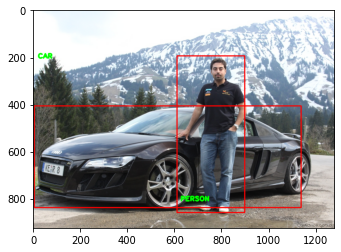

In [15]:
for classInd, conf, box in zip(classIndex.flatten(), confidance.flatten(),bbox) :
    cv2.rectangle(img,box,(0,0,255),3)
    cv2.putText(img, classNames[classInd-1].upper(),(box[0]+15, box[0]+200),font,fontScale,(0,255,0),5)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))